In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
from src import overlay
from src import helper

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib
plt.style.use("ggplot")
import seaborn as sns

In [4]:
# Prepare relative dirs
root_dir = Path(".").joinpath("..")
data_dir = root_dir.joinpath("data", "overlay")
report_dir = helper.mkdir_if_not_exist( root_dir.joinpath("report","overlay") )
figs = []

### Load Data and preprocess

In [5]:
# Load data
df = overlay.load_data(data_dir)
df.head()

,path,filename,folder,cellid,roiid,channels,img
0,../data/overlay/1/0101-06-1.tif,0101-06-1.tif,1,0101-06,1,"[droplet, mcp]","[droplet, mcp]"
1,../data/overlay/2/0101-07-1.tif,0101-07-1.tif,2,0101-07,1,"[mcp, droplet]","[mcp, droplet]"
2,../data/overlay/2/0101-08-1.tif,0101-08-1.tif,2,0101-08,1,"[mcp, droplet]","[mcp, droplet]"
3,../data/overlay/2/0101-08-2.tif,0101-08-2.tif,2,0101-08,2,"[mcp, droplet]","[mcp, droplet]"
4,../data/overlay/2/0101-09-1.tif,0101-09-1.tif,2,0101-09,1,"[mcp, droplet]","[mcp, droplet]"


In [6]:
# Crop out droplet
align=False
df2 = overlay.crop_droplet(df, align=align, verbose=True)
df2.head()

After droplet segmentation, ...
    70 images remained.
    0 images thrown out because
        more than one droplets identified, OR
        couldn't fit circular gaussian to the droplet.
After rotating and cropping, ...
    68 images remained.
    2 images thrown out because:
        Droplet too close to the edge of image,
        which might introduce empty pixels into further analysis.


,path,filename,folder,cellid,roiid,channels,img,n_droplet,pos,rad,fwhm,cropped,cropped_pos,cropped_dim
46,../data/overlay/2/1228-12-1.tif,1228-12-1.tif,2,1228-12,1,"[mcp, droplet]","[mcp, droplet]",1,"[39.0, 37.0]",9.113821,14.628367,"[mcp, droplet]","[15.0, 15.0]",31.0
35,../data/overlay/2/1228-09-7.tif,1228-09-7.tif,2,1228-09,7,"[mcp, droplet]","[mcp, droplet]",1,"[22.0, 27.0]",9.113821,14.313053,"[mcp, droplet]","[14.0, 14.0]",29.0
52,../data/overlay/2/1228-13-4.tif,1228-13-4.tif,2,1228-13,4,"[mcp, droplet]","[mcp, droplet]",1,"[39.0, 30.0]",9.113821,13.533015,"[mcp, droplet]","[14.0, 14.0]",29.0
36,../data/overlay/2/1228-09-8.tif,1228-09-8.tif,2,1228-09,8,"[mcp, droplet]","[mcp, droplet]",1,"[29.0, 31.0]",9.113821,13.234234,"[mcp, droplet]","[13.0, 13.0]",27.0
47,../data/overlay/2/1228-12-2.tif,1228-12-2.tif,2,1228-12,2,"[mcp, droplet]","[mcp, droplet]",1,"[41.0, 40.0]",9.113821,13.147101,"[mcp, droplet]","[13.0, 13.0]",27.0


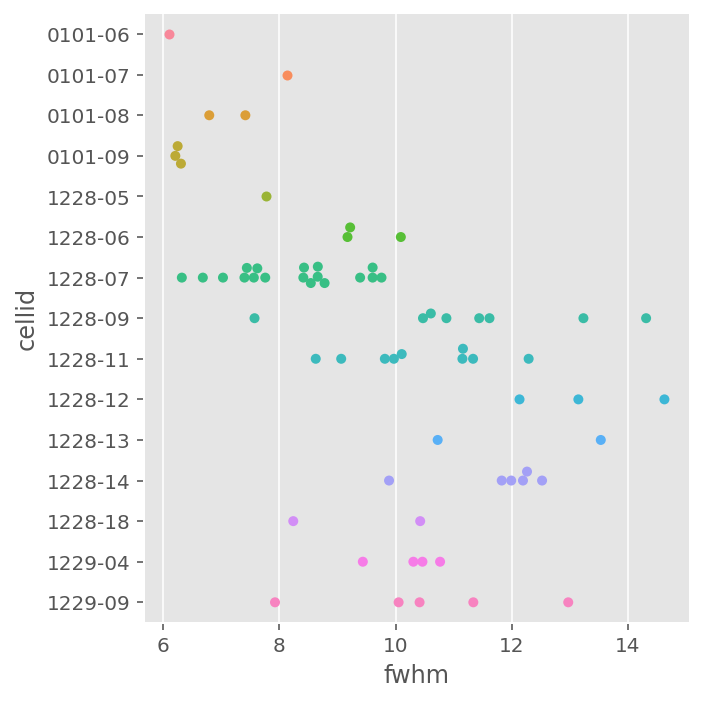

In [7]:
# Take a look at the distribution of FWHM
fig = sns.catplot(y="cellid", x="fwhm", kind="swarm", data=df2.sort_values("cellid"))

In [8]:
# Filter out images with small droplet and resample remaining images
filter_fwhm = 7
df3 = overlay.resize_to_smallest(df2, filter_fwhm=filter_fwhm)

After filtering out small droplets, ...
    61 images remained.
    7 images thrown out.
    Filtering criteria: FWHM >= 7 pixels.
Prepared resampled images as an xr.Dataset stored in column `resized`, ...
    Image dimensions: x: 15, y: 15.


In [9]:
df3.head()

,path,filename,folder,cellid,roiid,channels,img,n_droplet,pos,rad,fwhm,cropped,cropped_pos,cropped_dim,resized
46,../data/overlay/2/1228-12-1.tif,1228-12-1.tif,2,1228-12,1,"[mcp, droplet]","[mcp, droplet]",1,"[39.0, 37.0]",9.113821,14.628367,"[mcp, droplet]","[15.0, 15.0]",31.0,"[droplet, mcp]"
35,../data/overlay/2/1228-09-7.tif,1228-09-7.tif,2,1228-09,7,"[mcp, droplet]","[mcp, droplet]",1,"[22.0, 27.0]",9.113821,14.313053,"[mcp, droplet]","[14.0, 14.0]",29.0,"[droplet, mcp]"
52,../data/overlay/2/1228-13-4.tif,1228-13-4.tif,2,1228-13,4,"[mcp, droplet]","[mcp, droplet]",1,"[39.0, 30.0]",9.113821,13.533015,"[mcp, droplet]","[14.0, 14.0]",29.0,"[droplet, mcp]"
36,../data/overlay/2/1228-09-8.tif,1228-09-8.tif,2,1228-09,8,"[mcp, droplet]","[mcp, droplet]",1,"[29.0, 31.0]",9.113821,13.234234,"[mcp, droplet]","[13.0, 13.0]",27.0,"[droplet, mcp]"
47,../data/overlay/2/1228-12-2.tif,1228-12-2.tif,2,1228-12,2,"[mcp, droplet]","[mcp, droplet]",1,"[41.0, 40.0]",9.113821,13.147101,"[mcp, droplet]","[13.0, 13.0]",27.0,"[droplet, mcp]"


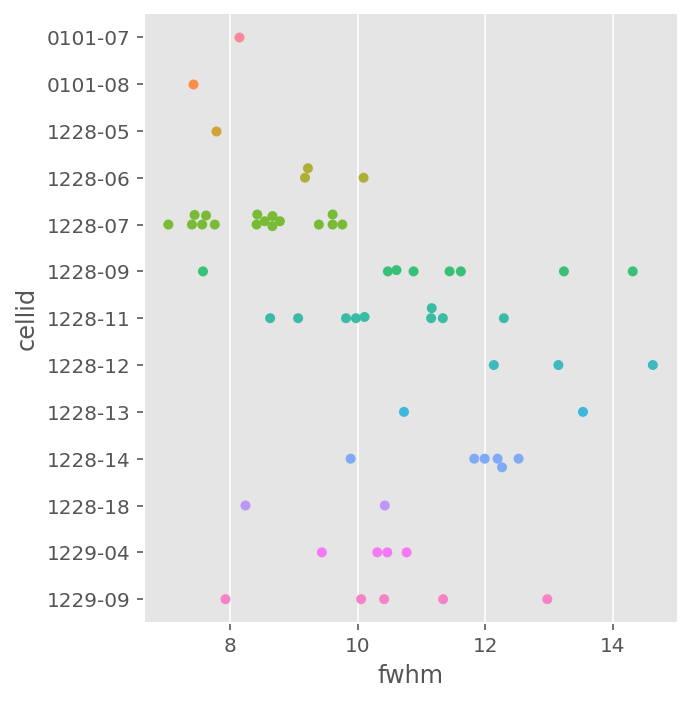

In [10]:
sns.catplot(y="cellid", x="fwhm", kind="swarm", data=df3.sort_values("cellid"))

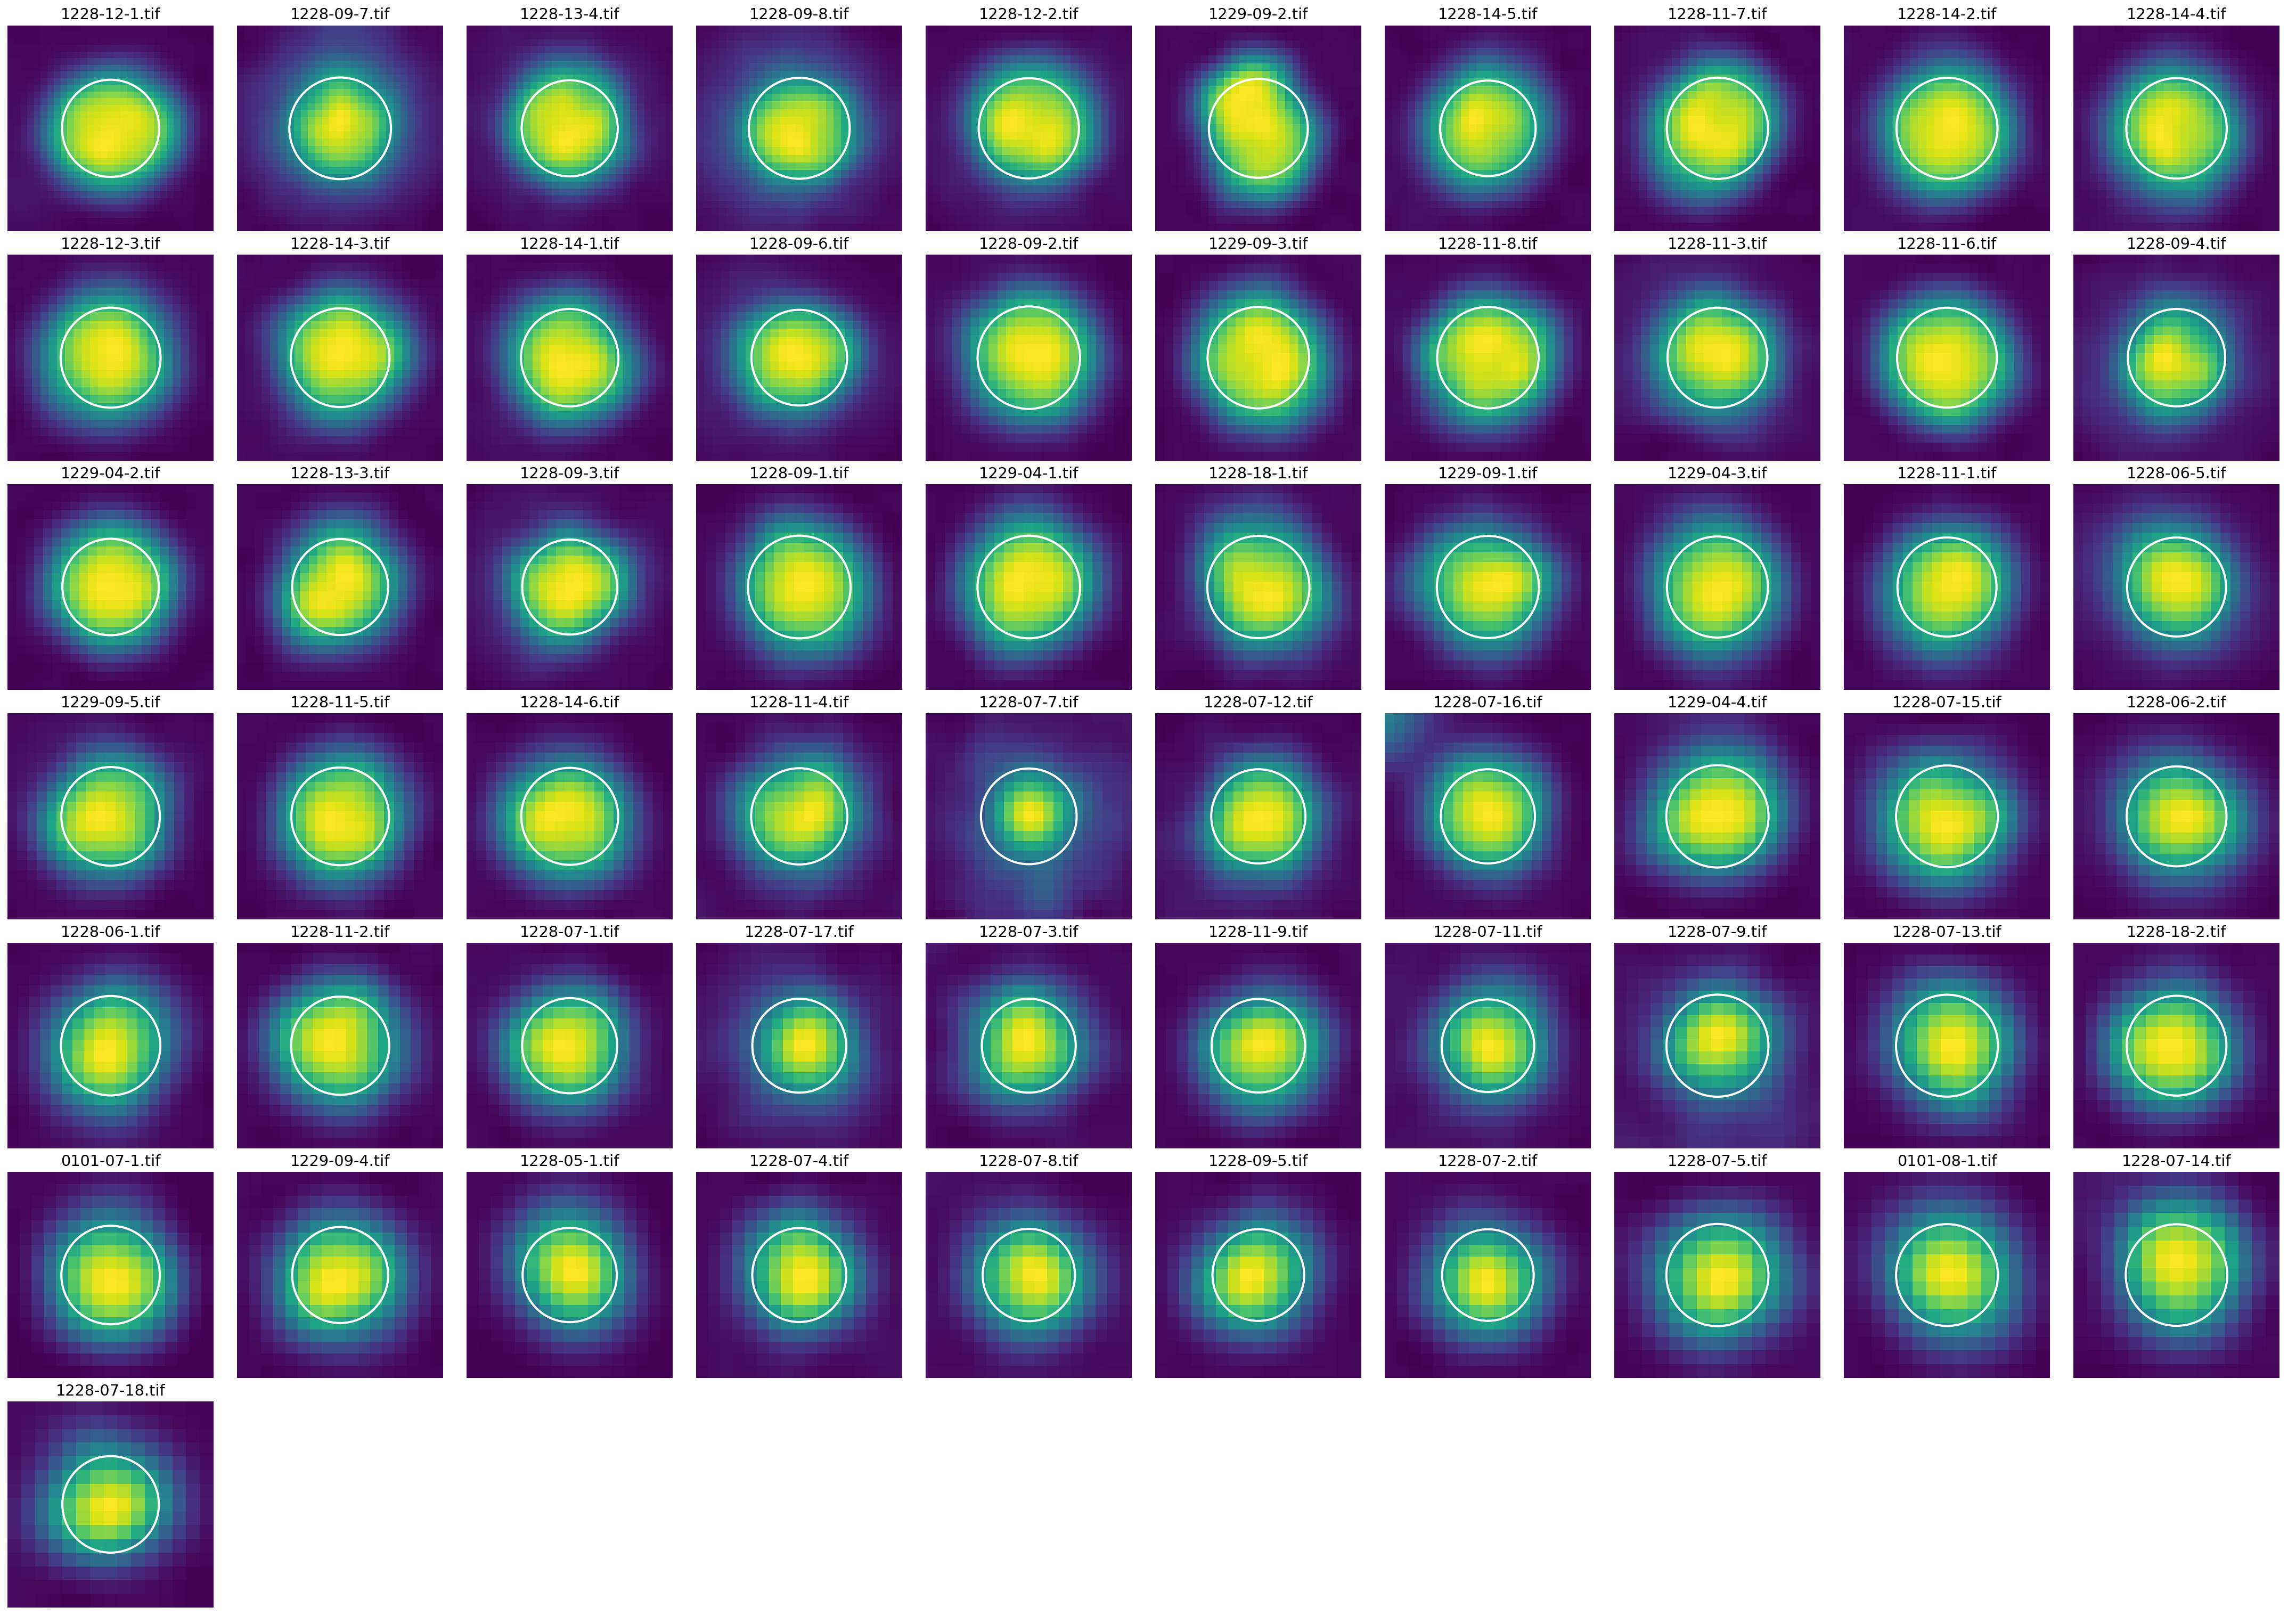

In [11]:
fig = overlay.showall_single_channel(df3, "cropped", "droplet", "cropped_pos")
figs.append([fig, "cropped_droplets"])

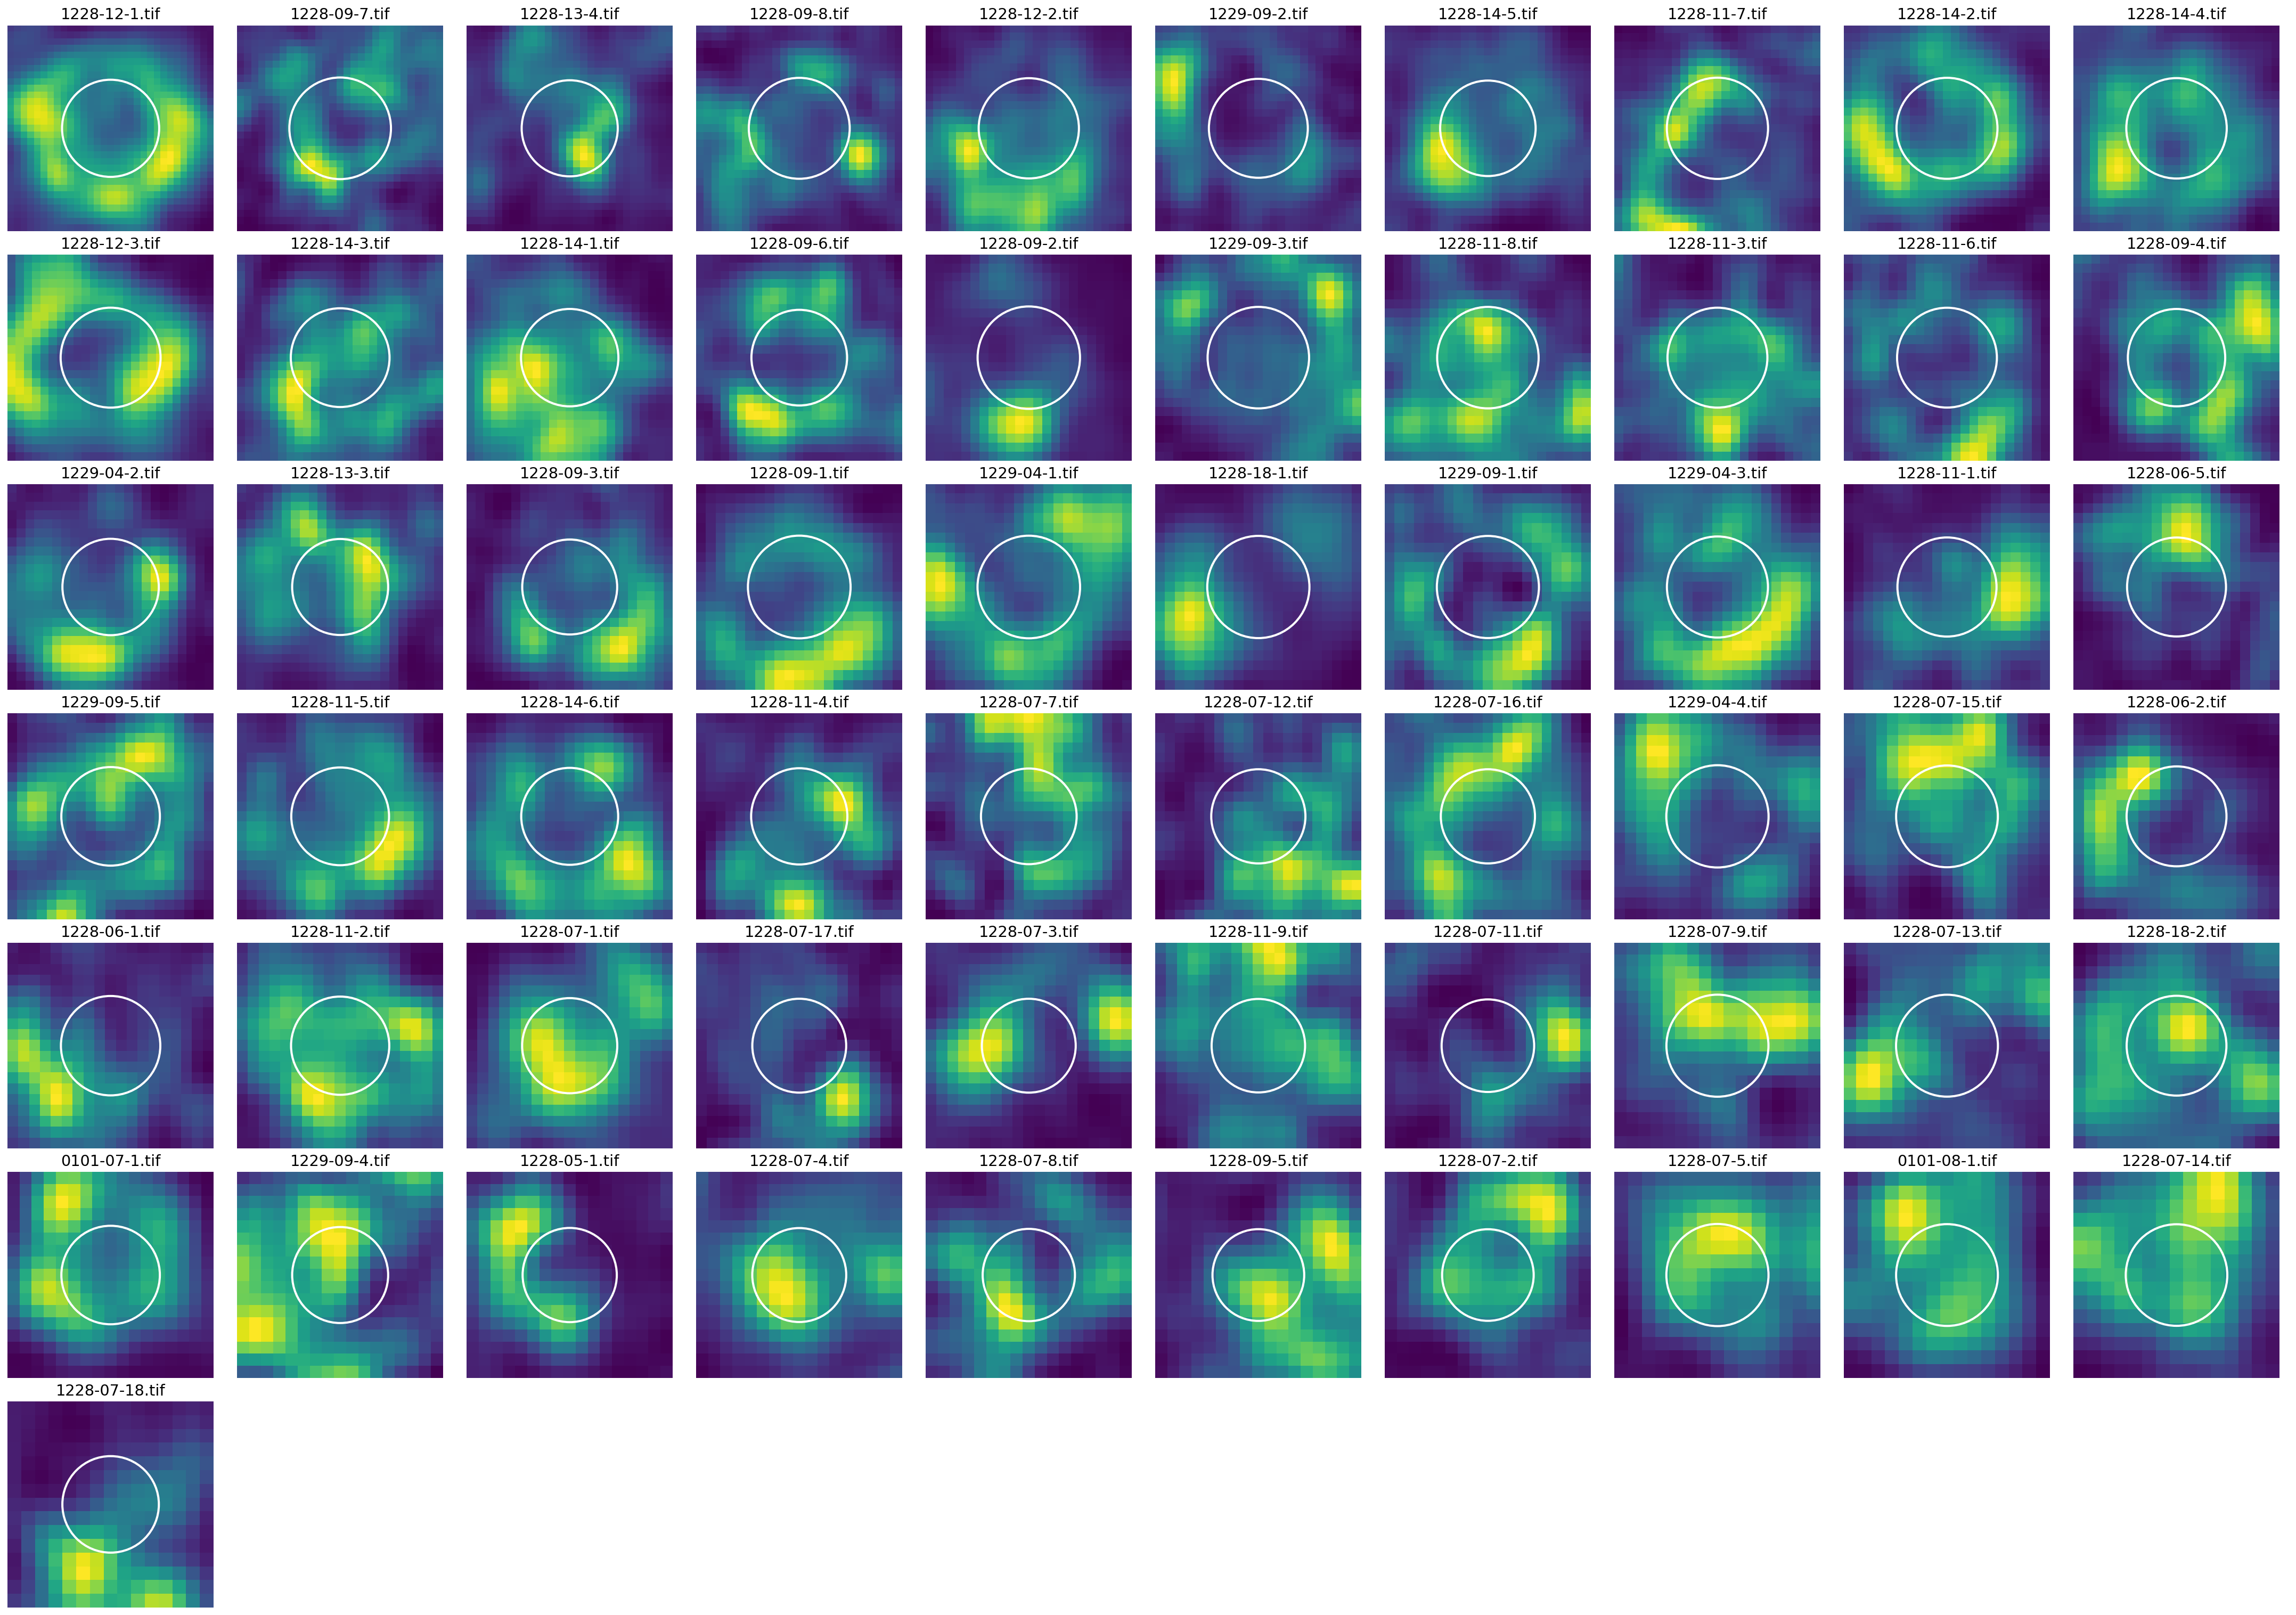

In [12]:
fig = overlay.showall_single_channel(df3, "cropped", "mcp", "cropped_pos")
figs.append([fig, "cropped_mcps"])

### Analysis

1. Average resized images

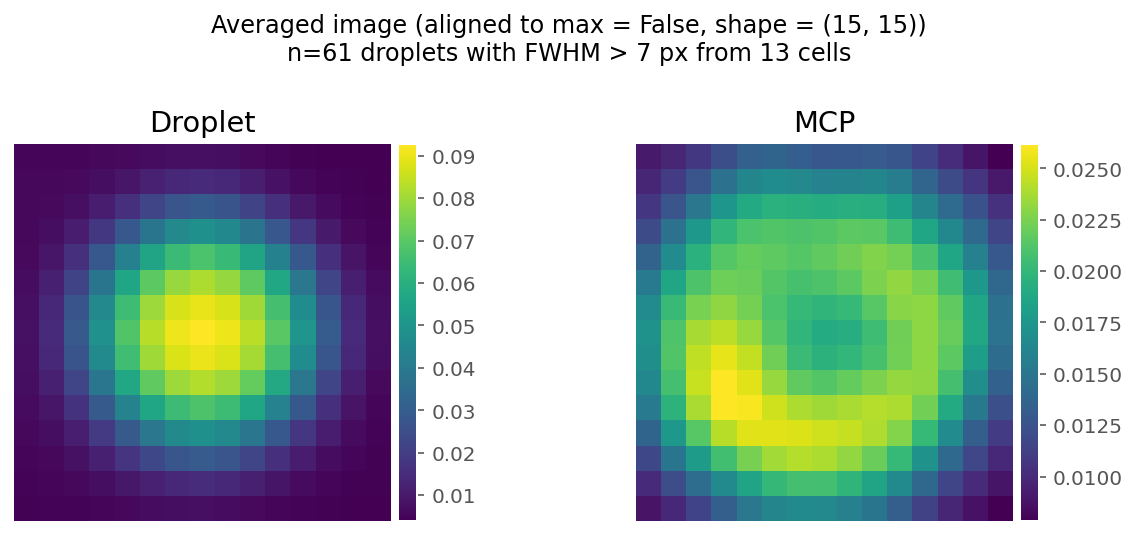

In [13]:
# Collect resized images in a single list for each channel
droplets = np.stack([row.resized.droplet.values for _,row in df3.iterrows()], axis=-1)
mcps = np.stack([row.resized.mcp.values for _,row in df3.iterrows()], axis=-1)

# Show averaged images
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax = ax.ravel()
im1 = ax[0].imshow(np.mean(droplets, axis=-1))
ax[0].set_axis_off()
ax[0].set_title("Droplet")
helper.colorbar(im1)
im2 = ax[1].imshow(np.mean(mcps, axis=-1))
ax[1].set_axis_off()
ax[1].set_title("MCP")
helper.colorbar(im2)

fig.suptitle(f"Averaged image (aligned to max = {align}, shape = {droplets.shape[:-1]})\n" + 
             f"n={droplets.shape[-1]} droplets " + 
             f"with FWHM > {filter_fwhm} px " + 
             f"from {df3.cellid.unique().size} cells")
fig.tight_layout(h_pad=2, w_pad=8)

figs.append([fig, "averaged_image"])

2. Calculate radial profile by azimuthal averaging

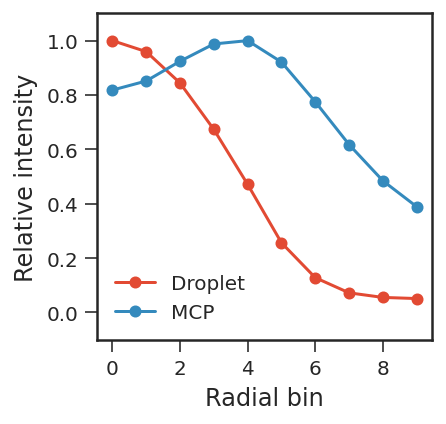

In [14]:
# Azimuthal averaging
profiles = [helper.radial_profile(np.mean(x, axis=-1))
            for x in [droplets, mcps]]
profiles = [profile / np.nanmax(profile) for profile in profiles]
channels = ["droplet", "mcp"]
df_rad = pd.DataFrame.from_dict(dict(zip(channels,profiles)))
df_rad = (df_rad
    .assign(bin=df_rad.index)
    .melt(id_vars=["bin"], value_vars=["droplet","mcp"],
          var_name="channel", value_name="RelativeIntensity"))

with matplotlib.style.context("seaborn-ticks"):
    fig, ax = plt.subplots(figsize=(3,3))
    data = df_rad[df_rad["channel"]=="droplet"]
    ax.plot(data.bin, data.RelativeIntensity, label="Droplet", marker='o', markersize=5)
    data = df_rad[df_rad["channel"]=="mcp"]
    ax.plot(data.bin, data.RelativeIntensity, label="MCP", marker='o', markersize=5)
    ax.legend()
    ax.set_xlabel("Radial bin")
    ax.set_ylabel("Relative intensity")
    ax.set_ylim((-0.1,1.1))
    
figs.append([fig, "radial_profile"])

### Write useful results into report directory

In [15]:
# Set to TRUE only when running the entire notebook from scratch
to_save=True

# save averaged images as ImageJ compatible tif
import tifffile

if to_save:
    img = np.stack([np.mean(x, axis=-1) for x in [droplets,mcps]])
    img = img.astype(np.float32)
    fpath = report_dir.joinpath("averaged_image.tif")
    with tifffile.TiffWriter(str(fpath), imagej=True) as tif:
        for i in range(img.shape[0]):
            tif.save(img[i])

# save other created figures as svg files
if to_save:
    for fig,name in figs:
        fig.savefig(report_dir.joinpath(name+".svg"), dpi=300)
        
if to_save:
#     df3.to_csv(report_dir.joinpath("processed_images_info.csv"), index=False)
    df_rad.to_csv(report_dir.joinpath("radial_profile.csv"), index=False)

### Always include session information

In [16]:
from sinfo import sinfo
sinfo(na=False, dependencies=True, write_req_file=False)

-----
matplotlib  3.3.0
numpy       1.19.1
pandas      1.0.3
seaborn     0.10.1
sinfo       0.3.1
tifffile    2020.7.24
-----
PIL                 7.2.0
appnope             0.1.0
backcall            0.2.0
cffi                1.14.1
cloudpickle         1.5.0
cycler              0.10.0
cytoolz             0.10.1
dask                2.22.0
dateutil            2.8.1
decorator           4.4.2
imagecodecs         2020.5.30
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
matplotlib          3.3.0
numpy               1.19.1
pandas              1.0.3
parso               0.7.1
pexpect             4.8.0
pickleshare         0.7.5
prompt_toolkit      3.0.5
psutil              5.7.2
ptyprocess          0.6.0
pygments            2.6.1
pyparsing           2.4.7
pytz                2020.1
pywt                1.1.1
scipy               1.5.2
seaborn             0.10.1
sinfo               0.3.1
six